In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [ ]:
''' converts from '.csv' file to a numpy array '''
def extractData(s):
  data_df = pd.read_csv(s)
  return data_df.to_numpy()

In [ ]:
''' seperates the first column of a np array as index / serial numbers'''
def seperateIndex(data):
  return data[:,1:]

In [ ]:
''' seperates the last column of a np array as label, and the rest as features'''
def seperateFeatures(data):
  X = data[:,:-1]
  y = data[:,-1]
  y.shape = (y.size,1)
  return (X,y)

In [ ]:
''' returns np array with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  return ((data - np.mean(data, axis=0))/np.std(data, axis=0))

In [ ]:
'''returns np array with values descaled w.r.t original data'''
def deMeanScaling(data_scaled, original_data):
  return ((data_scaled*np.std(original_data, axis=0))+np.mean(original_data, axis=0))

In [ ]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [ ]:
###################################################################################################################################################################################

In [ ]:
'''Adds second degree features to given design matrix'''
def degree2(X):
  m,n = X.shape
  c_X = np.copy(X)
  features = np.hsplit(X, n)
  for i in range(n):
    for j in range(i,n):
      c_X = np.append(c_X, features[i]*features[j], axis = 1)

  return c_X

In [ ]:
'''Adds second and third degree features to given design matrix'''
def degree3(X):
  m,n = X.shape
  X_2 = degree2(X)
  features = np.hsplit(X, n)
  for i in range(n):
    for j in range(i,n):
      for k in range(j,n):
        X_2 = np.append(X_2, features[i]*features[j]*features[k], axis=1)

  return X_2

In [ ]:
'''returns regularised mse between two vectors (hypothesis and target vector)'''
def regLoss(y, hypothesis, reg_coeff, theta):
  m = y.size
  c_theta = theta.copy()
  c_theta[0] = 0
  loss = (1/(2*m))*(np.sum((hypothesis - y)**2) + reg_coeff * np.sum(np.square(c_theta)))
  return loss

In [ ]:
'''returns mse between two vectors (hypothesis and target vector)'''
def loss(hypothesis, y):
  m = y.size
  return (1/(2*m))*(np.sum((hypothesis - y)**2))

In [ ]:
'''returns regularised gradient between two vectors (hypothesis and target vector)'''
def regGradient(X, y, hypothesis, reg_coeff, theta):
  m = y.size
  c_theta = theta.copy()
  c_theta[0] = 0
  grad = (X.T@(hypothesis-y) + reg_coeff*c_theta)/m
  return grad

In [ ]:
def train(X_train, y_train, num_iter, alpha, reg_coeff):

  '''
  X_train     --> design matrix (before adding features)
  y_train     --> target value / true result (m x 1)
  num_iter    --> number of iteration (int)
  alpha       --> learning rate
  reg_coeff   --> regularisation coefficient
  '''

  # initialising losses
  losses = []

  # adding features to X
  X_train = degree3(X_train)
  X_train = meanScaling(X_train)
  X_train = addBias(X_train)

  m,n = X_train.shape
  # m --> number of trainig examples
  # n --> number of features 

  #reshaping and scaling y
  y_train.shape = (m,1)
  y_train = meanScaling(y_train)
  
  #initialising theta
  theta = np.zeros((n,1))

  # training loop
  for i in range(num_iter):
    hypothesis = X_train@theta

    #calculating and appending loss
    losses.append( regLoss(y_train, hypothesis, reg_coeff, theta) ) 

    #calculating gradient
    grad = regGradient(X_train, y_train, hypothesis, reg_coeff, theta)

    # updating theta
    theta -= alpha*grad

  #plotting loss
  for i in range(-1, -6, -1):
    print(losses[i])
  plt.plot(losses)

  return theta

In [ ]:
def predict(X_test, y_test, y_train, theta):

  '''
  X_test  --> Design matrix of features of testing data
  y_test  --> Target value vector of testing data
  y_train --> Target value vector of trainig data (for descaling)
  theta   --> parameter obtained after training
  '''

  # adding features to X, scaling and adding bias term
  X_test = degree3(X_test)
  X_test = meanScaling(X_test)
  X_test = addBias(X_test)

  #m --> number of training examples
  m = X_test.shape[0]

  hypothesis = deMeanScaling(X_test@theta, y_train)
  print('Loss =', loss(hypothesis, y_test))

  return hypothesis

In [ ]:
data_train = extractData('/content/drive/MyDrive/WOC/Datasets/Polynomial_train.csv')
data_train = seperateIndex(data_train)
X_train,y_train = seperateFeatures(data_train)

In [ ]:
data_test = extractData('/content/drive/MyDrive/WOC/Datasets/Polynomial_test.csv')
data_test = seperateIndex(data_test)
X_test,y_test = seperateFeatures(data_test)

3.522220338241244e-05
3.5222203732734346e-05
3.522220408653184e-05
3.522220444384143e-05
3.522220480469998e-05


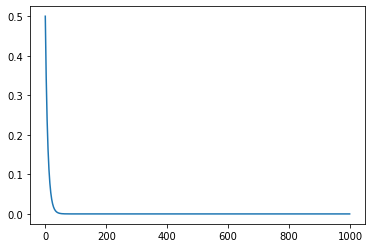

In [ ]:
theta = train(X_train, y_train, 1000, 0.06, 1)

In [ ]:
hypothesis = predict(X_test, y_test, y_train, theta)

Loss = 61.64628540222587


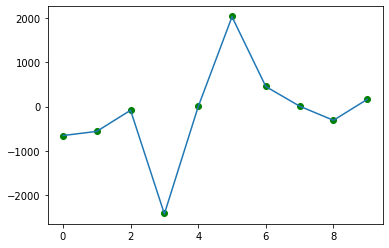

In [ ]:
plt.scatter(range(10), y_test[:10], c='g')
plt.plot(range(10), hypothesis[:10])